In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import functools

In [128]:
maestro_cm35 = "../../../datos/CM35/maestro_cm35.csv"
maestro_cm35_dt = pd.read_csv(maestro_cm35)

maestro_cm35_dt.rename(columns = {'edad': 'grupo_edad'}, inplace = True)


maestro_cm35_dt

,Unnamed: 0,indicador,tipo_infraccion,provincia,anyo,valor,fecha
0,0,Hechos conocidos,Total infracciones penales,CANARIAS,2019,95639.0,20191231
1,1,Hechos conocidos,Total infracciones penales,CANARIAS,2018,90649.0,20181231
2,2,Hechos conocidos,Total infracciones penales,CANARIAS,2017,91359.0,20171231
3,3,Hechos conocidos,Total infracciones penales,CANARIAS,2016,88782.0,20161231
4,4,Hechos conocidos,Total infracciones penales,CANARIAS,2015,89539.0,20151231
...,...,...,...,...,...,...,...
47233,47233,Total delitos registrados,NaN,NaN,2001,61501.0,20011231
47234,47234,Total delitos esclarecidos,NaN,NaN,2001,20599.0,20011231
47235,47235,Tasa de delitos esclarecidos,NaN,NaN,2000,32.0,20001231
47236,47236,Total delitos registrados,NaN,NaN,2000,63641.0,20001231


In [129]:
df = maestro_cm35_dt.groupby(['provincia','indicador']).agg(Total_por_tipo=('valor', 'sum'))
df

Total_por_tipo
provincia              indicador                                                         
CANARIAS               Detenciones e investigados (Menores)                      124460.0
                       Detenciones e investigados (general)                     3088676.0
                       Detenciones e investigados Extranjeros (infracc...        320764.0
                       Detenciones e investigados Extranjeros (naciona...        327464.0
                       Hechos conocidos                                         2867864.0
                       Hechos esclarecidos                                      1265990.0
                       Tasa de criminalidad                                        1920.9
Las Palmas             Detenciones e investigados (Menores)                       77600.0
                       Detenciones e investigados (general)                     1731572.0
                       Detenciones e investigados Extranjeros (infracc...        171536.0
                       Detenciones e investigados Extranjeros (naciona...        175566.0
                       Hechos conocidos                                         1520111.0
                       Hechos esclarecidos                                       718738.0
                       Tasa de criminalidad                                        1928.9
S/C Tenerife           Tasa de criminalidad                                        1914.2
Santa Cruz de Tenerife Detenciones e investigados (Menores)                       46860.0
                       Detenciones e investigados (general)                     1357104.0
                       Detenciones e investigados Extranjeros (infracc...        149228.0
                       Detenciones e investigados Extranjeros (naciona...        151898.0
                       Hechos conocidos                                         1347753.0
                       Hechos esclarecidos                                       547252.0

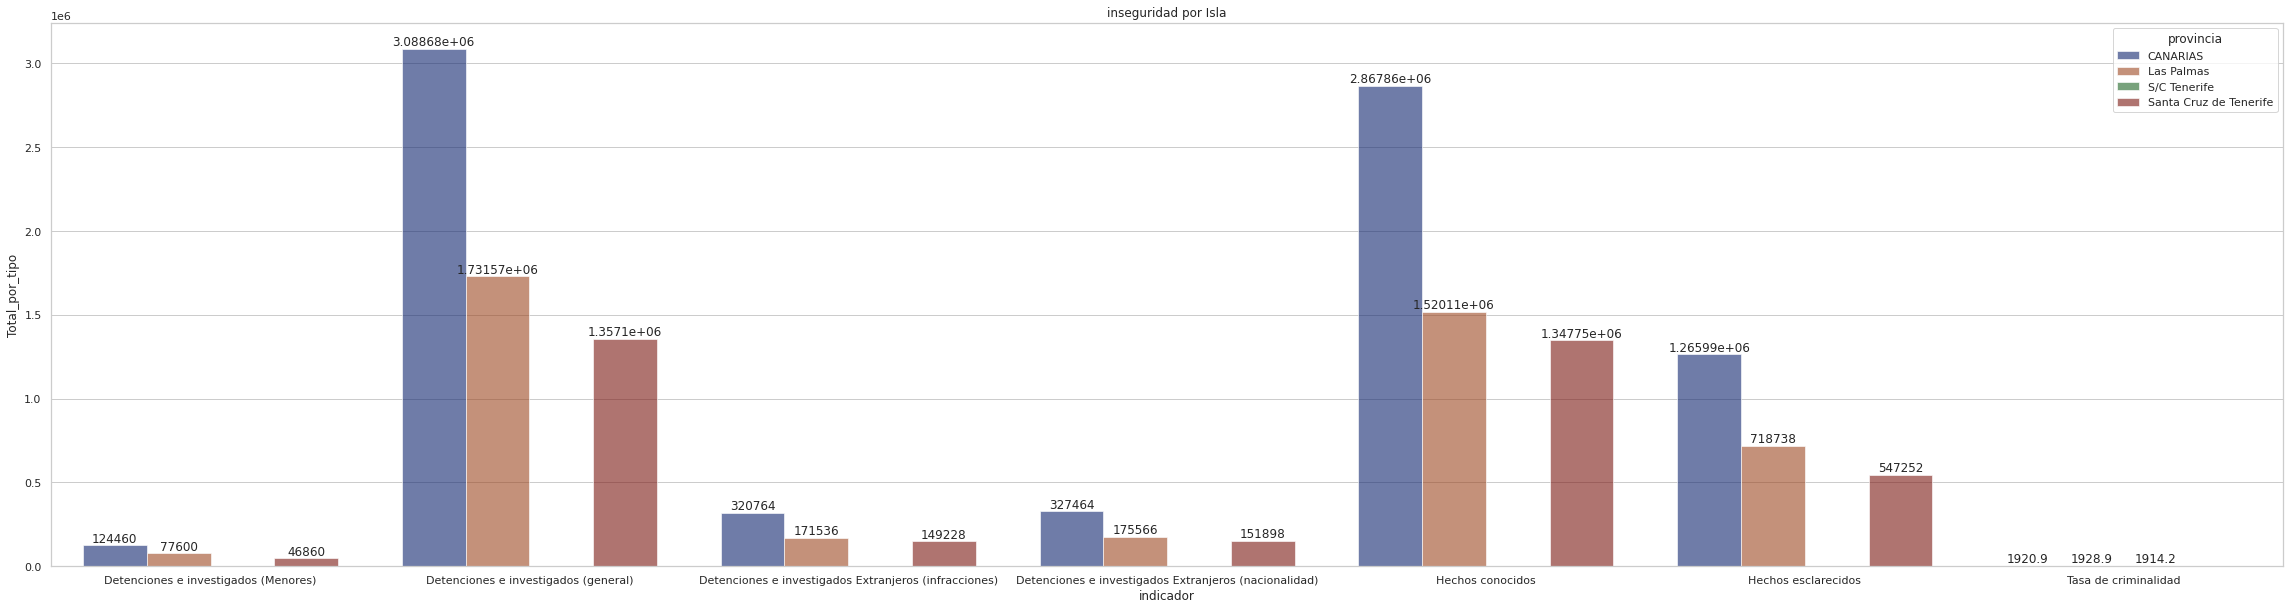

In [130]:
df = maestro_cm35_dt.groupby(['provincia','indicador']).agg(Total_por_tipo=('valor', 'sum'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sb.barplot(x="indicador",
           y="Total_por_tipo",
           hue="provincia",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('inseguridad por Isla')

for container in ax.containers:
    ax.bar_label(container)


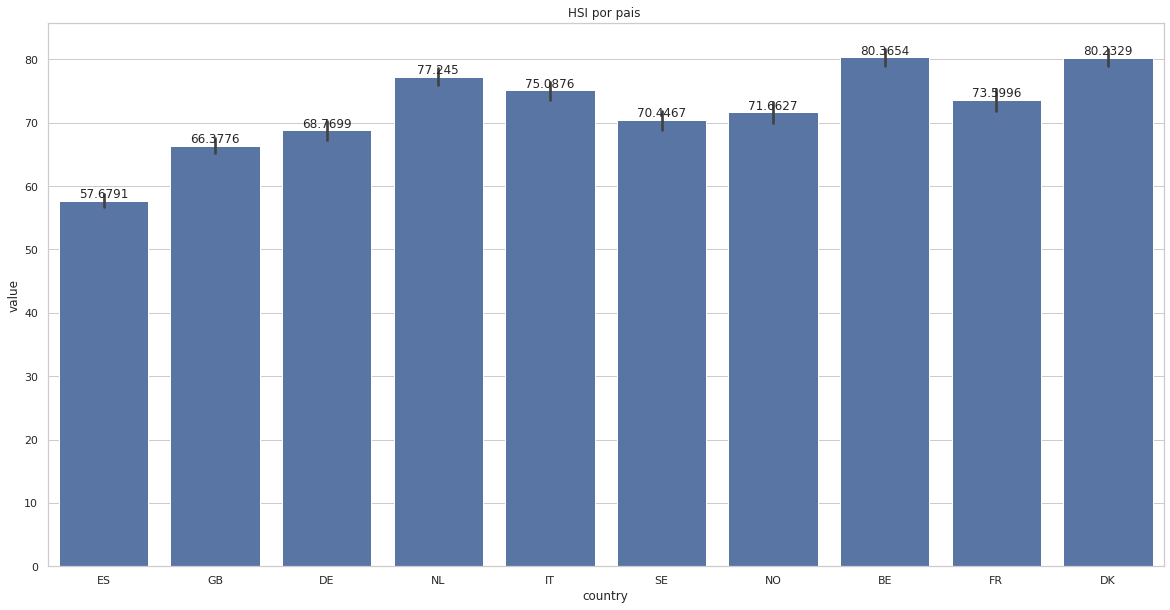

In [156]:
HSI = "../../../datos/CM01_1/HSI_2021-03-01.csv"
HSI_dt = pd.read_csv(HSI)
HSI_dt.head()
HSI_filtered = HSI_dt[HSI_dt.value != 0].sort_values(by = 'value')
fig, ax = plt.subplots(figsize=(20,10))


ax = sb.barplot(x="country", y="value",
            data=HSI_filtered,
            color="b")
ax.set_title('HSI por pais ')
for container in ax.containers:
    ax.bar_label(container)